#   Yulu_CaseStudy

# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Business Problem

The company wants to know:

    Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    How well those variables describe the electric cycle demands


# Dataset:

Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered


In [2]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
import calendar

In [3]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Formatting the column in a more readable way

In [6]:
df['date'] = df['datetime'].apply(lambda x: x.split()[0]) # Make date feature
df['year'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
df['month'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
df['day'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[2]) # Make day feature
df['hour'] = df['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
df['minute'] = df['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
df['second'] = df['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature

In [7]:
df['weekday'] = df['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [8]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [9]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
season={
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}
df["season"]=df["season"].replace(season)

In [11]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
weather={
    1 : 'Clear',
    2 : 'Mist, Few clouds',
    3 : 'Light Snow, Rain, Thunder',
    4 : 'Heavy Snow, Rain, Thunder,Fog'
}
df["weather"]=df["weather"].replace(weather)

In [13]:
holiday={
    0 : 'Not Holiday',
    1 : 'Holiday'
}
df["holiday"]=df["holiday"].replace(holiday)

In [14]:
workingday={
    0 : 'Not workingday',
    1 : 'workingday'
}
df["workingday"]=df["workingday"].replace(workingday)

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,Not Holiday,Not workingday,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,Not Holiday,Not workingday,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,Not Holiday,Not workingday,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,Not Holiday,Not workingday,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,Not Holiday,Not workingday,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  hour        10886 non-null  object 
 17  minute      10886 non-null  object 
 18  second      10886 non-null  object 
 19  weekday     10886 non-nul

# Types of variables:

    Categorical - Season, Holiday, Working day, Weather
    Timeseries - Datetime
    Numerical - Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count



In [17]:
#number of unique values in our data
for i in df.columns:
    print(i,":", df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822
date : 456
year : 2
month : 12
day : 19
hour : 24
minute : 1
second : 1
weekday : 7


In [18]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [19]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
year          0
month         0
day           0
hour          0
minute        0
second        0
weekday       0
dtype: int64

# Observations

1. There are no missing values in data. 
2. There are 4 unique weather values in data. 

# Univariate Analysis

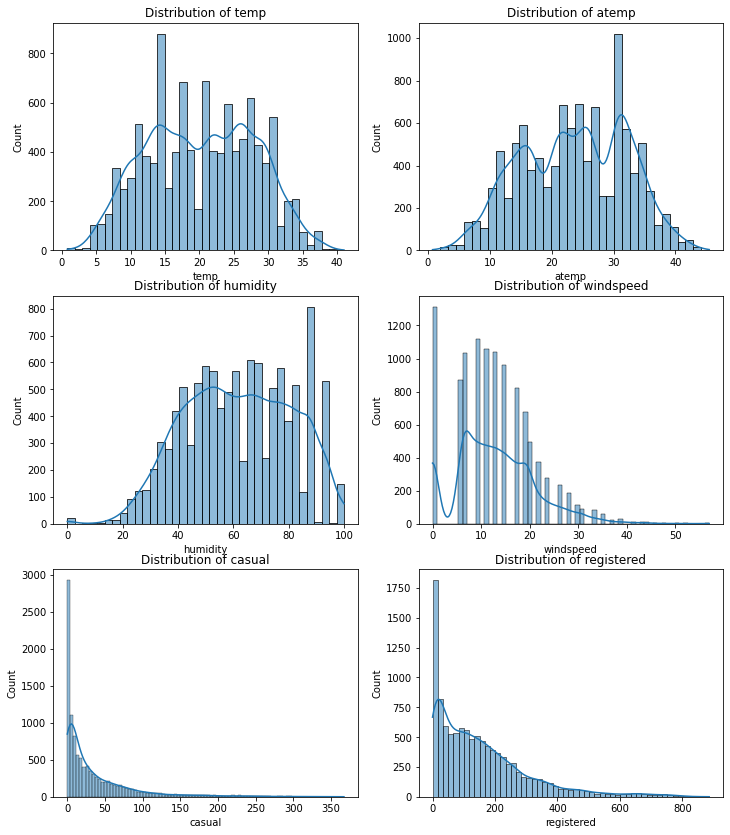

In [20]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="temp", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of temp')
sns.histplot(data=df, x="atemp", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of atemp')
sns.histplot(data=df, x="humidity", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of humidity')
sns.histplot(data=df, x="windspeed", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of windspeed')
sns.histplot(data=df, x="casual", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of casual')
sns.histplot(data=df, x="registered", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of registered')
plt.show()

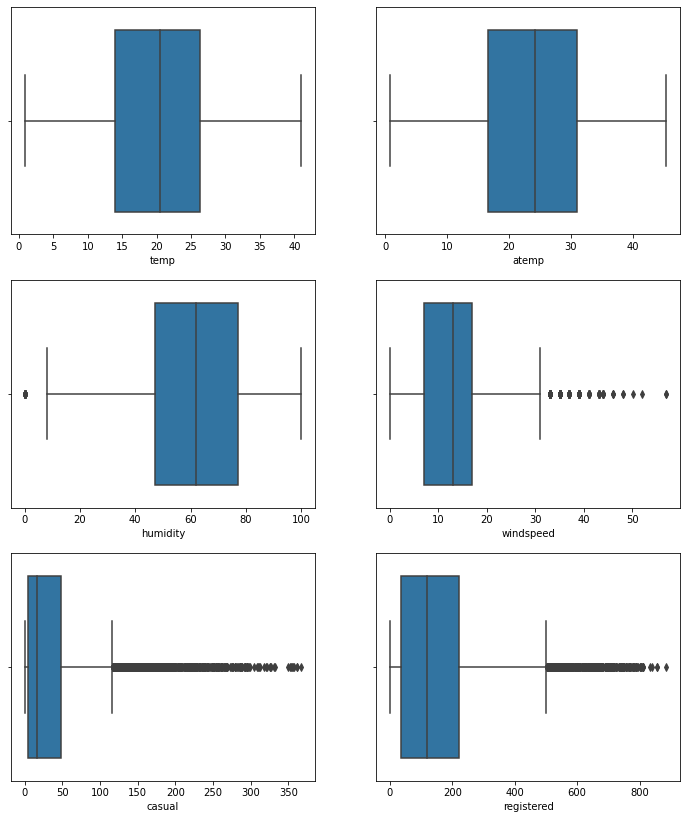

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="temp", ax=axis[0,0])
sns.boxplot(data=df, x="atemp", ax=axis[0,1])
sns.boxplot(data=df, x="humidity", ax=axis[1,0])
sns.boxplot(data=df, x="windspeed", ax=axis[1,1])
sns.boxplot(data=df, x="casual", ax=axis[2,0])
sns.boxplot(data=df, x="registered", ax=axis[2,1])
plt.show()

# Obervation:

Even from the boxplots it is quite clear that:

1. Temp,atemp and humidity are not  having outliers. 
2. WindSpeed, Casual and Registered are having more outliers.


# Understanding the distribution of the data for the Categorical attributes:

[Text(0.5, 1.0, 'Season - counts')]

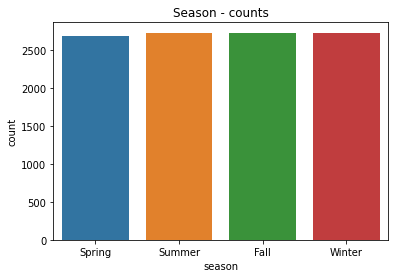

In [22]:
sns.countplot(data=df, x='season').set(title='Season - counts')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist, Few clouds'),
  Text(2, 0, 'Light Snow, Rain, Thunder'),
  Text(3, 0, 'Heavy Snow, Rain, Thunder,Fog')])

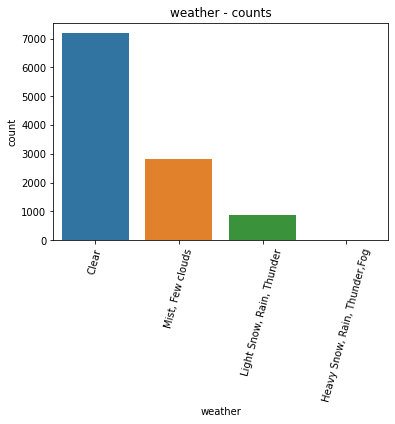

In [23]:
sns.countplot(data=df, x='weather').set(title='weather - counts')
plt.xticks(rotation = 75)

[Text(0.5, 1.0, 'holiday - counts')]

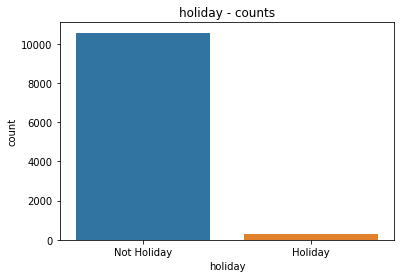

In [24]:
sns.countplot(data=df, x='holiday').set(title='holiday - counts')

[Text(0.5, 1.0, 'workingday - counts')]

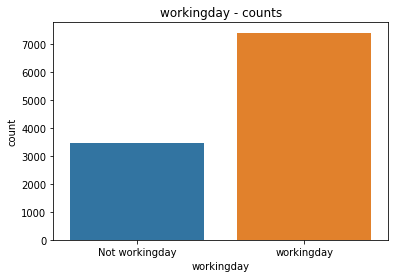

In [25]:
sns.countplot(data=df, x='workingday').set(title='workingday - counts')

# Observations

1. No Difference in count of bikes is seen in all seasons.
2. Most Bikes are booked in Working Day.
3. Most Bikes are booked in Not Holiday .
4. Most Bikes are booked on Clear Day.

Text(0.5, 1.0, 'Distribution of count')

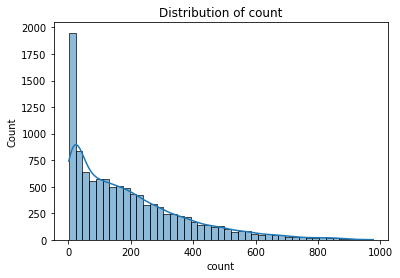

In [26]:
sns.histplot(data=df, x="count", kde=True).set_title('Distribution of count')

<AxesSubplot:xlabel='count'>

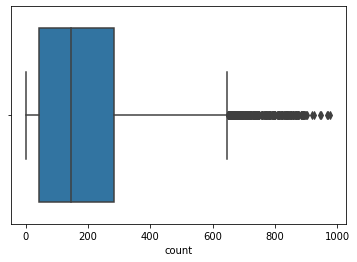

In [27]:
sns.boxplot(data=df, x="count")

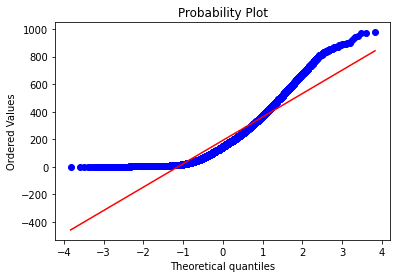

In [28]:
plt = stats.probplot(df['count'], plot=sns.mpl.pyplot)

# Observations:

1. Our target variable, count is not normally distributed.
2. Our target variable is right-skewed.
3. There are multiple outliers in the variable.

# Bivariate Analysis

Text(0, 0.5, 'Average Count')

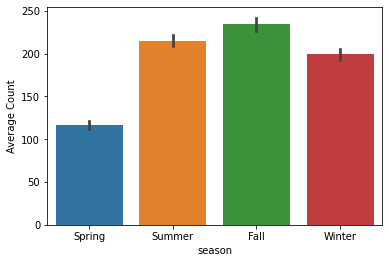

In [29]:
sns.barplot(x ='season', y ='count', data = df).set_ylabel('Average Count')

Text(0, 0.5, 'Average Count')

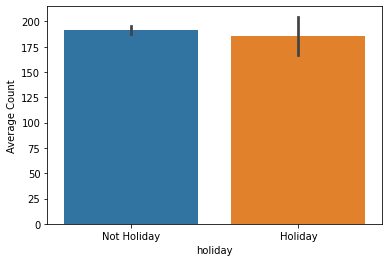

In [30]:
sns.barplot(x ='holiday', y ='count', data = df).set_ylabel('Average Count')

Text(0, 0.5, 'Average Count')

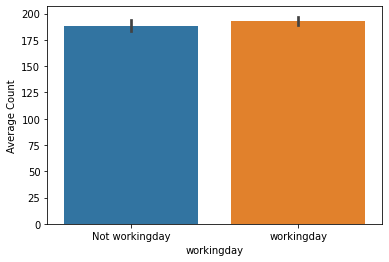

In [31]:
sns.barplot(x ='workingday', y ='count', data = df).set_ylabel('Average Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist, Few clouds'),
  Text(2, 0, 'Light Snow, Rain, Thunder'),
  Text(3, 0, 'Heavy Snow, Rain, Thunder,Fog')])

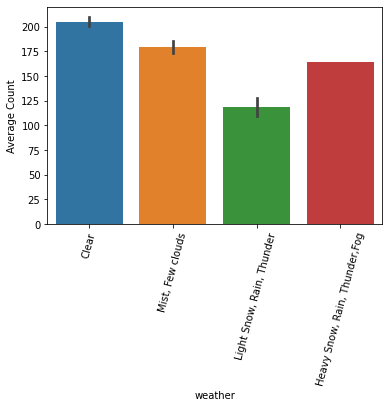

In [36]:
sns.barplot(x ='weather', y ='count', data = df).set_ylabel('Average Count')
plt.xticks(rotation = 75)

[Text(0.5, 1.0, 'Rental amounts by year')]

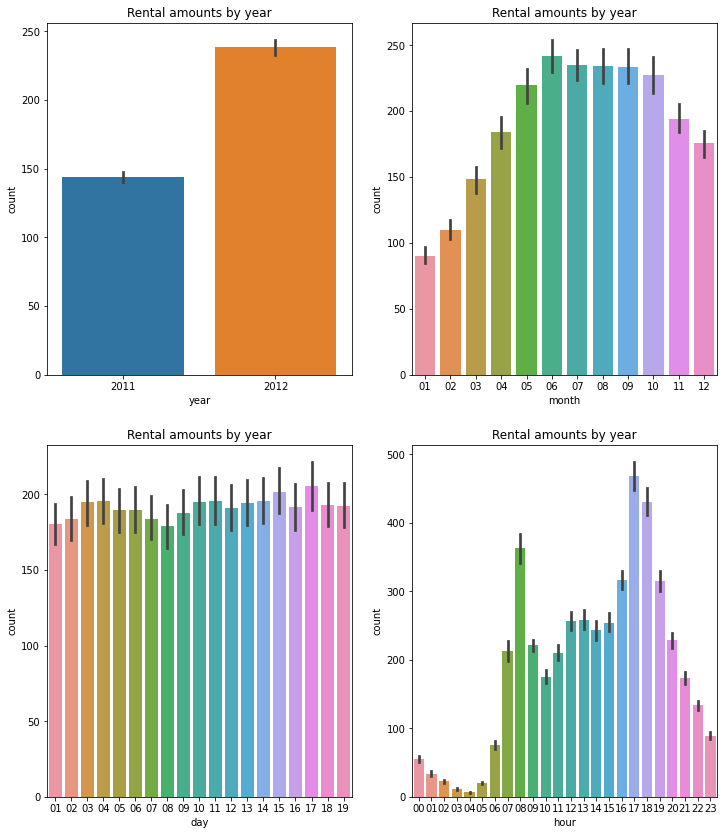

In [37]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='year', y='count', data=df, ax=axis[0,0])
axis[0,0].set(title='Rental amounts by year')
sns.barplot(x='month', y='count', data=df, ax=axis[0,1])
axis[0,1].set(title='Rental amounts by year')
sns.barplot(x='day', y='count', data=df, ax=axis[1,0])
axis[1,0].set(title='Rental amounts by year')
sns.barplot(x='hour', y='count', data=df, ax=axis[1,1])
axis[1,1].set(title='Rental amounts by year')

# relation between the dependent and independent variable

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist, Few clouds'),
  Text(2, 0, 'Light Snow, Rain, Thunder'),
  Text(3, 0, 'Heavy Snow, Rain, Thunder,Fog')])

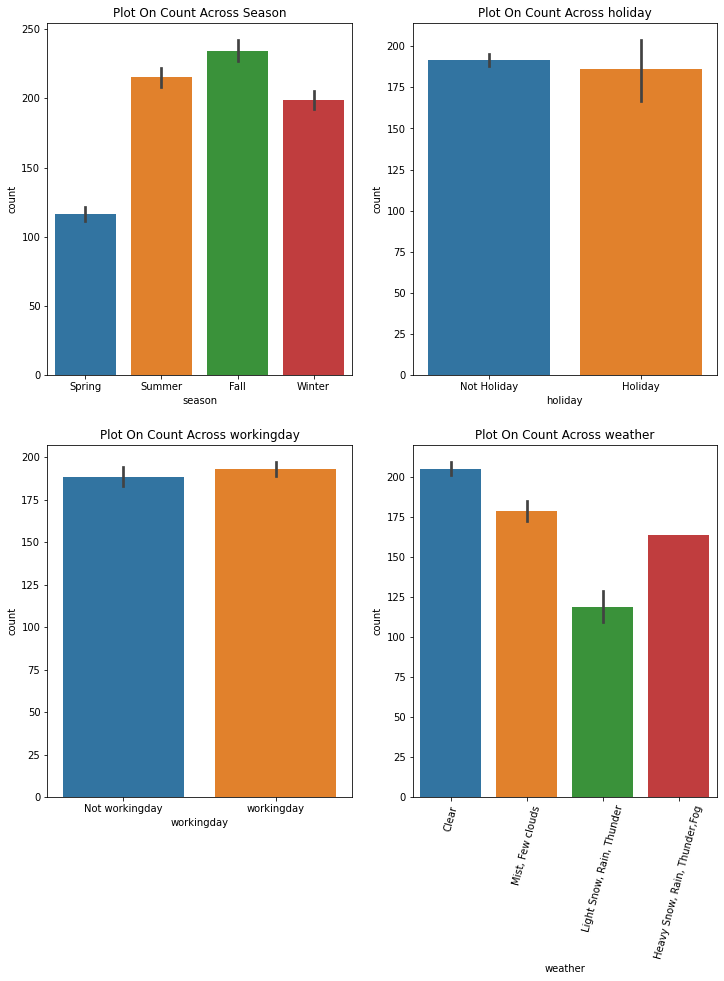

In [100]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.barplot(x='season', y='count', data=df, ax=axis[0,0])
axis[0,0].set(title='Plot On Count Across Season')
sns.barplot(x='holiday', y='count', data=df, ax=axis[0,1])
axis[0,1].set(title='Plot On Count Across holiday')
sns.barplot(x='workingday', y='count', data=df, ax=axis[1,0])
axis[1,0].set(title='Plot On Count Across workingday')
sns.barplot(x='weather', y='count', data=df, ax=axis[1,1])
axis[1,1].set(title='Plot On Count Across weather')
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Mist, Few clouds'),
  Text(2, 0, 'Light Snow, Rain, Thunder'),
  Text(3, 0, 'Heavy Snow, Rain, Thunder,Fog')])

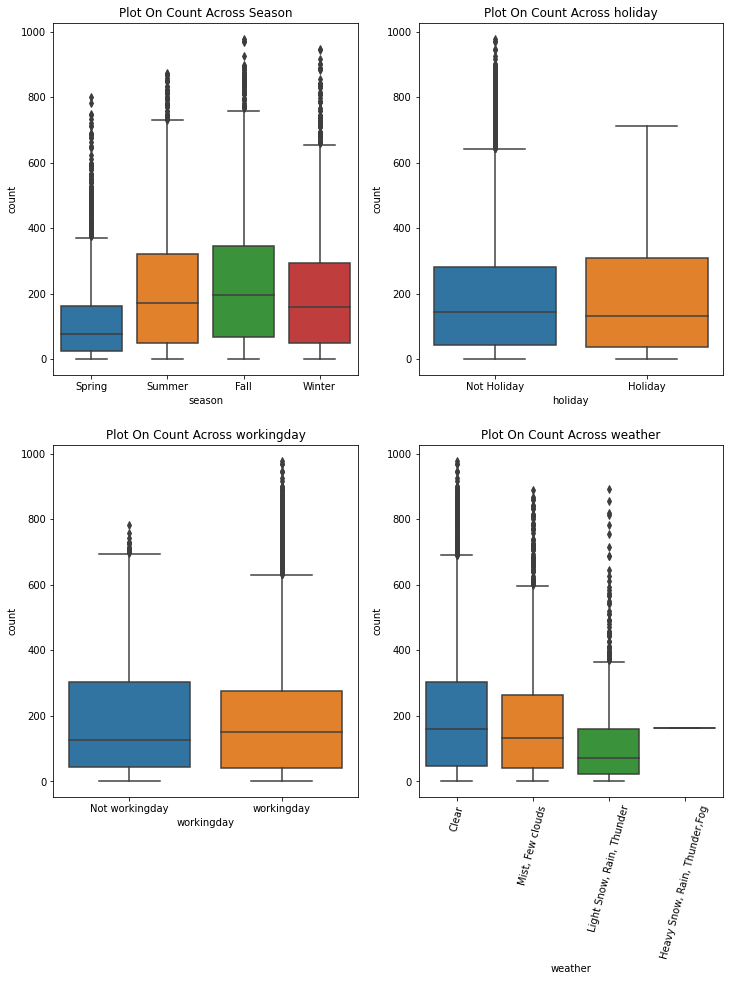

In [101]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(x='season', y='count', data=df, ax=axis[0,0])
axis[0,0].set(title='Plot On Count Across Season')
sns.boxplot(x='holiday', y='count', data=df, ax=axis[0,1])
axis[0,1].set(title='Plot On Count Across holiday')
sns.boxplot(x='workingday', y='count', data=df, ax=axis[1,0])
axis[1,0].set(title='Plot On Count Across workingday')
sns.boxplot(x='weather', y='count', data=df, ax=axis[1,1])
axis[1,1].set(title='Plot On Count Across weather')
plt.xticks(rotation = 75)

# Observations:

1. On Average more bikes are Rented during Fall Season.
2. On Average more bikes are Rented during Clear Weather.
3. On Average more bikes are Rented during Working Days.
4. And there are more Outliers are present in all plots so we can't decide further by seeing these plots
5. As these are samples with some Outliers we can use Hypothesis Testing to find relationship between them.

# Multivariate Analysis

In [38]:
## correlation matrix for heat map
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<AxesSubplot:>

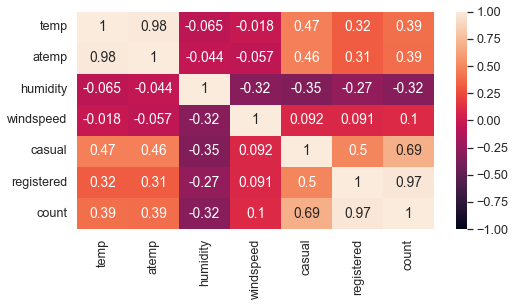

In [39]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),         
    annot=True, 
    vmin=-1, vmax=1)

# Observations

1. Humidity and Count are highly negatively correlated means if Humidity is High then count of Renting Bikes comes Down.
2. Humidity and Casual users are Highly negatively Correlated.
3. Humidity and Registered users are also highly negatively Correlated.
4. If Humidity is high then both Casual and Registered users won't Rent the Bikes.
5. Seems like Registerd users and Count of renting bikes are highly positively Correlated.
6. The registered user count has higher corelation with the count as compared to the casual user count.

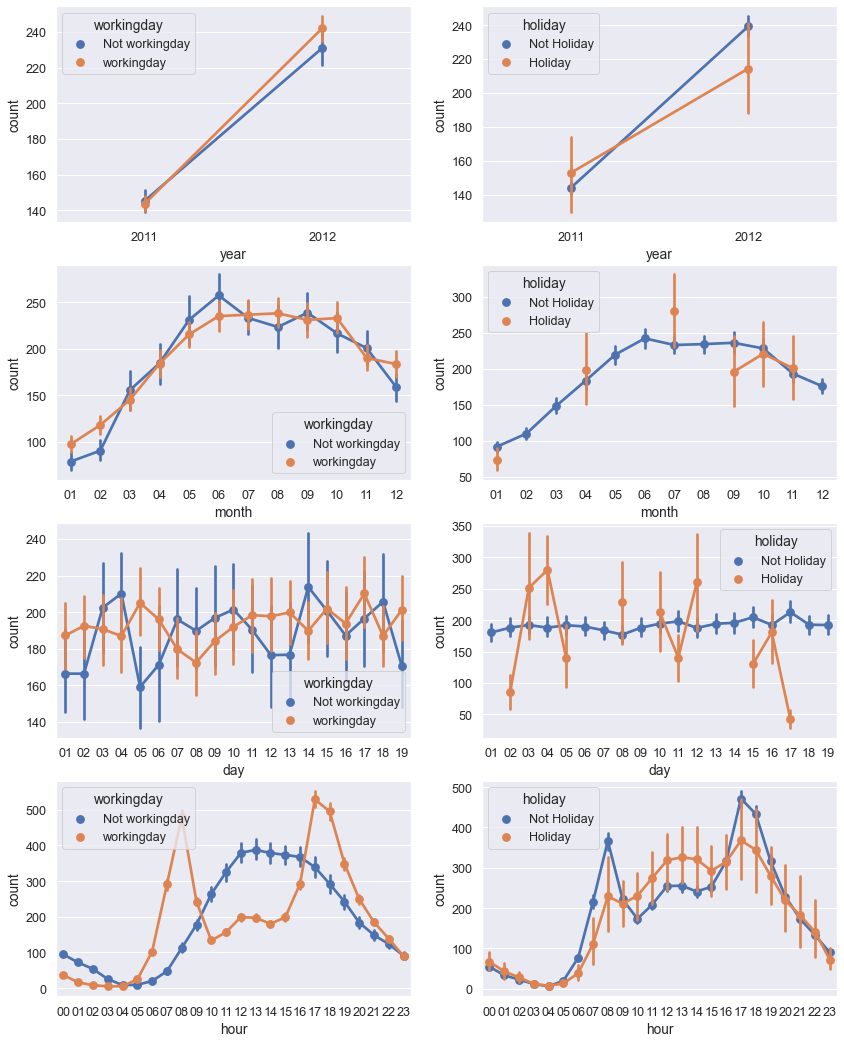

In [113]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)

sns.pointplot(x=df['year'], y=df['count'], hue=df['workingday'],ax=axis[0,0])
sns.pointplot(x=df['year'], y=df['count'], hue=df['holiday'],ax=axis[0,1])
sns.pointplot(x=df['month'], y=df['count'], hue=df['workingday'],ax=axis[1,0])
sns.pointplot(x=df['month'], y=df['count'], hue=df['holiday'],ax=axis[1,1])
sns.pointplot(x=df['day'], y=df['count'], hue=df['workingday'],ax=axis[2,0])
sns.pointplot(x=df['day'], y=df['count'], hue=df['holiday'],ax=axis[2,1])
sns.pointplot(x=df['hour'], y=df['count'], hue=df['workingday'],ax=axis[3,0])
sns.pointplot(x=df['hour'], y=df['count'], hue=df['holiday'],ax=axis[3,1])
plt.show()

# Observations


1. Renting Bikes increased in 2012 year compared to previous year on Working Days.
2. where as in Holidays renting bikes is reduced during year 2012 compared to previous year.
3. Renting Bikes is more During June Month both on Working Days and non Working Days.
4. Renting Bikes is more During morning in interval of 6-9 hours and 17-19 hours on Working Days.
5. Renting Bikes is more During morning in interval of 6-9 hours and 17-19 hours on non Holidays.
6. where as in Non Working Hours more renting of Bikes is seen in interval of 11-17 hours.

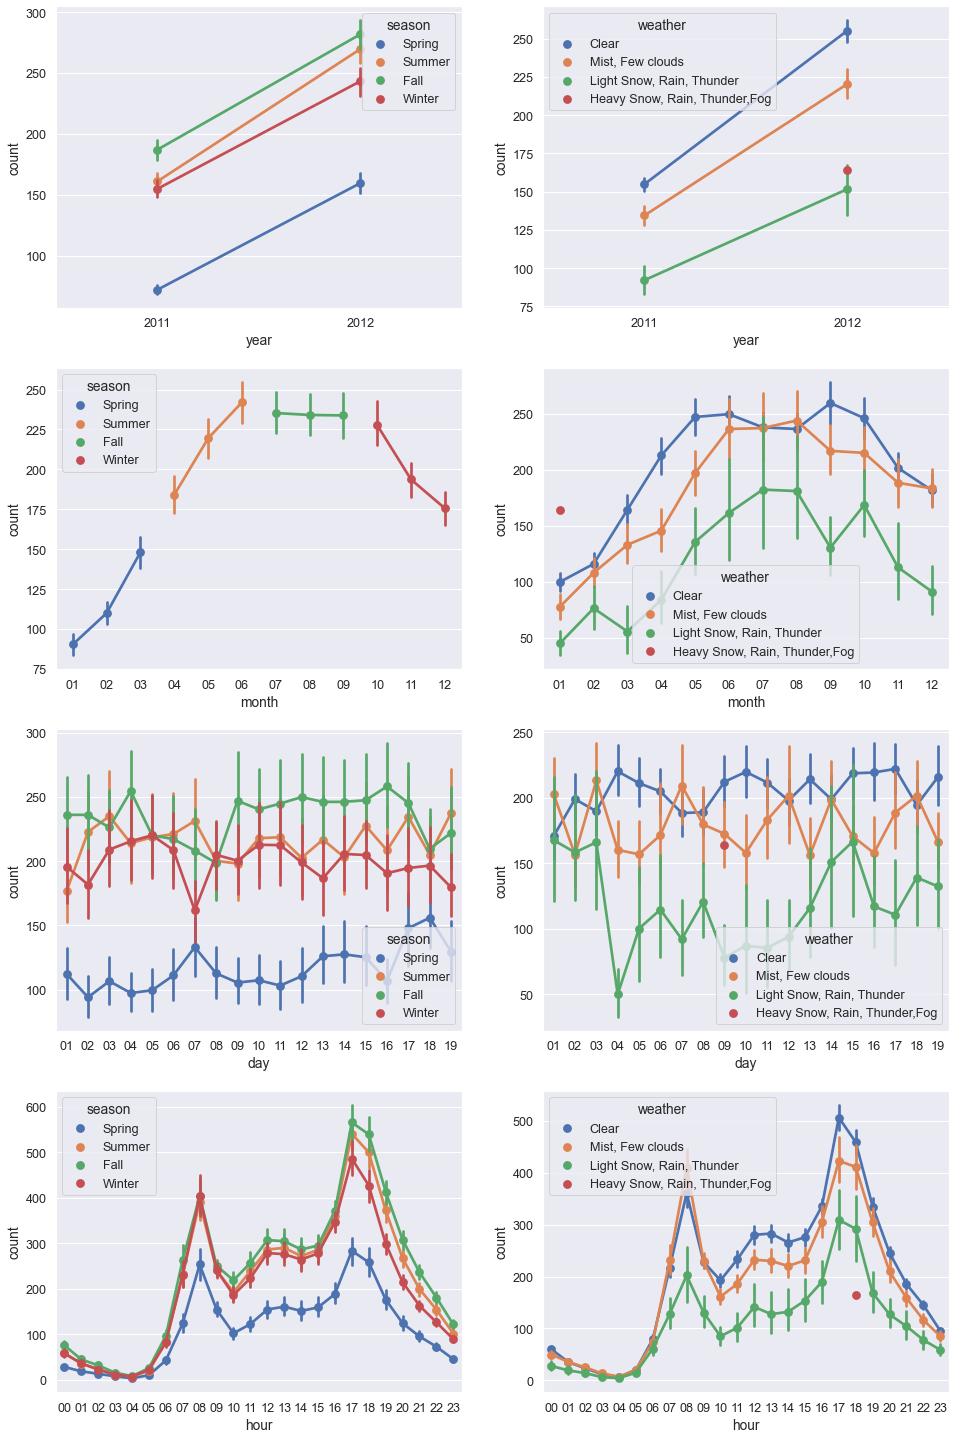

In [115]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 14))
fig.subplots_adjust(top=1.5)

sns.pointplot(x=df['year'], y=df['count'], hue=df['season'],ax=axis[0,0])
sns.pointplot(x=df['year'], y=df['count'], hue=df['weather'],ax=axis[0,1])
sns.pointplot(x=df['month'], y=df['count'], hue=df['season'],ax=axis[1,0])
sns.pointplot(x=df['month'], y=df['count'], hue=df['weather'],ax=axis[1,1])
sns.pointplot(x=df['day'], y=df['count'], hue=df['season'],ax=axis[2,0])
sns.pointplot(x=df['day'], y=df['count'], hue=df['weather'],ax=axis[2,1])
sns.pointplot(x=df['hour'], y=df['count'], hue=df['season'],ax=axis[3,0])
sns.pointplot(x=df['hour'], y=df['count'], hue=df['weather'],ax=axis[3,1])
plt.show()

# Observations

1. During Fall Season More Bikes are Rented during both the years.
2. Increase in Renting of Bikes is seen from 2011 to 2012.
3. During Clear Weather More Bikes are Rented that other Weather.
4. During 7-9 Hours and 17-19 Hours more Bikes are Rented Irrespective of Season Types.
5. During 7-9 Hours and 17-19 Hours more Bikes are Rented Irrespective of Weather Types.

# Hypothesis Testing

# 1.  Working Day has effect on number of electric cycles rented

#  T-Test Independent Test to check if Holiday has an effect on the number of electric cycles rented


# Step 1: Define Null & Alternate Hypothesis

*  H0 : The bike's renting count in working days and non- working days are equal.
*  Ha : The bike's renting count in working days is greater than non- working days.
*  alpha = 0.05


# Step 2: Validate the assumptions

* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.


# Checking assumptions of the test (Normality, Equal Variance)

In [42]:
df.shape

(10886, 20)

In [44]:
df['workingday'].value_counts(normalize = True) * 100

workingday        68.087452
Not workingday    31.912548
Name: workingday, dtype: float64

In [50]:
df['workingday'].value_counts()

workingday        7412
Not workingday    3474
Name: workingday, dtype: int64

In [65]:
working_data = df[df['workingday'] == 'workingday'].sample(3000)
not_working_data = df[df['workingday'] == 'Not workingday'].sample(3000)

In [68]:
var_working=np.std(working_data['count'])**0.5
var_working

13.517857937673515

In [88]:
var_not_working=np.std(not_working_data['count'])**0.5
var_not_working

13.150231851152544

In [110]:
stats.levene(working_data['count'], not_working_data['count'])

LeveneResult(statistic=0.023492044509543397, pvalue=0.8781896090862198)

# Observations

1. with manual checking of variance we can tell varaince is almost equal.
2. variance is same for both the samples after checking levene test.

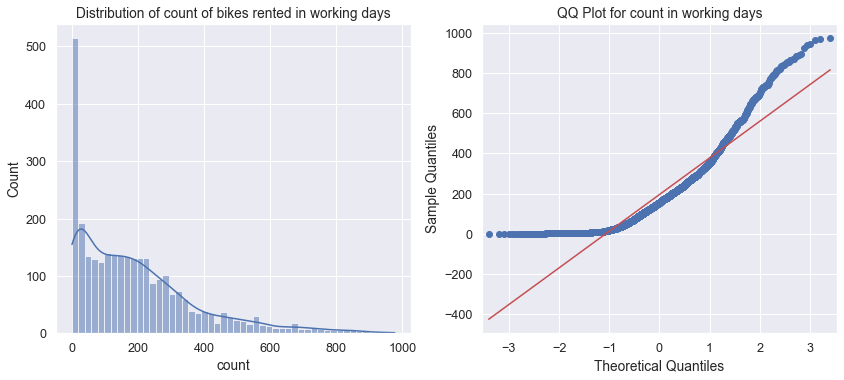

In [167]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=working_data,x='count',bins=50,kde=True,
             ax=axis[0]).set_title('Distribution of count of bikes rented in working days')
sm.qqplot(working_data['count'], line = 's',ax=axis[1])
axis[1].set_title('QQ Plot for count in working days')

plt.show()

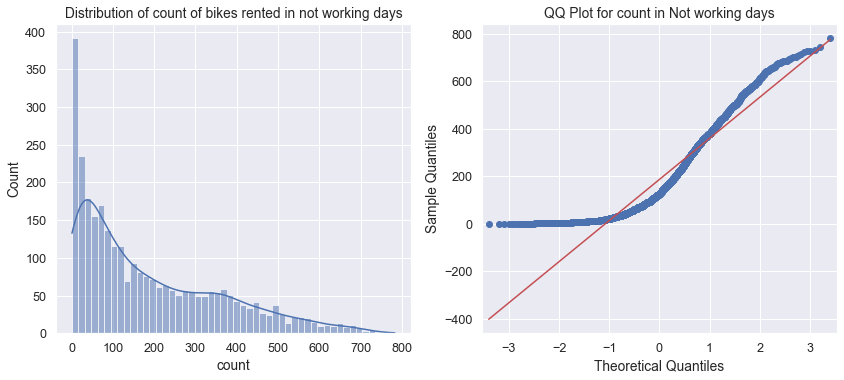

In [166]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=not_working_data,x='count',bins=50,kde=True,
             ax=axis[0]).set_title('Distribution of count of bikes rented in not working days')
sm.qqplot(not_working_data['count'], line = 's',ax=axis[1])
axis[1].set_title('QQ Plot for count in Not working days')

plt.show()

# Observations

1. Both the Distributions are Right Skewed.
2. Both are not normal Distribution as we can see in QQ plot.
3. in Levene test we can see that variance is not same.
4. So applying log on data to match the variance.

# Applying log on data 

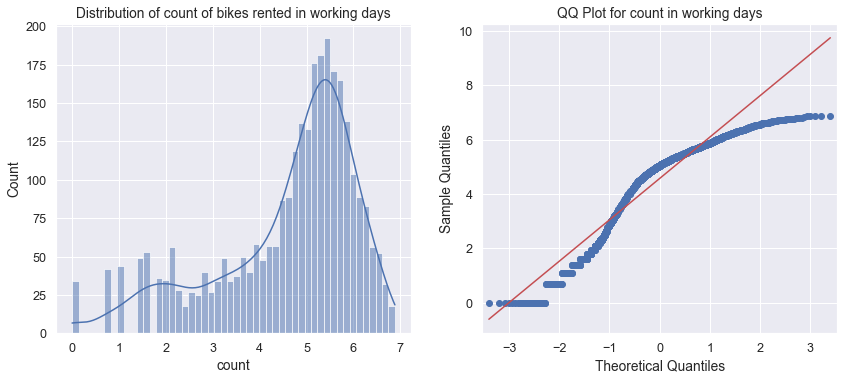

In [164]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=np.log(working_data['count']),bins=50,kde=True,
             ax=axis[0]).set_title('Distribution of count of bikes rented in working days')
sm.qqplot(np.log(working_data['count']), line = 's',ax=axis[1])
axis[1].set_title('QQ Plot for count in working days')

plt.show()

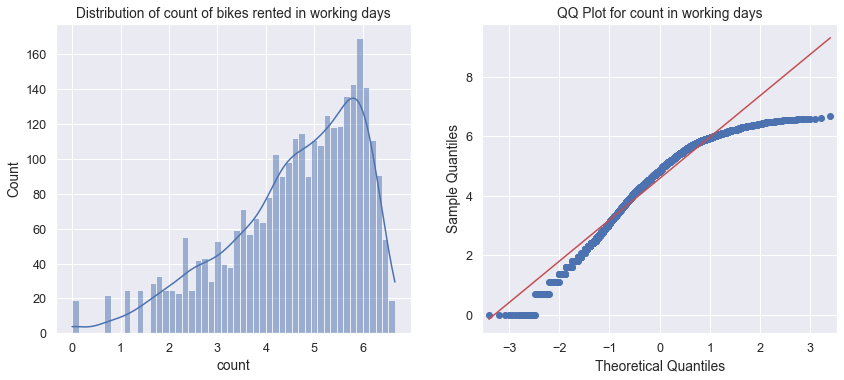

In [165]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=np.log(not_working_data['count']),bins=50,kde=True,
             ax=axis[0]).set_title('Distribution of count of bikes rented in working days')
sm.qqplot(np.log(not_working_data['count']), line = 's',ax=axis[1])
axis[1].set_title('QQ Plot for count in working days')

plt.show()

# Levene test and Shapiro wilk test

In [117]:
stats.levene(np.log(working_data['count']), np.log(not_working_data['count']))

LeveneResult(statistic=1.2367818327303748, pvalue=0.2661367475950182)

In [123]:
stats.shapiro(np.log(working_data['count']))

ShapiroResult(statistic=0.8979941606521606, pvalue=8.389153516373382e-41)

In [124]:
stats.shapiro(np.log(not_working_data['count']))

ShapiroResult(statistic=0.9337987303733826, pvalue=1.401810188928565e-34)

# Observations:

1. Now both the distributions are similar to normal
2. variances are equal by levene test.
3. According to Shapiro wilk test both the data come from normal distribution of data due to p value is less than 0.5
3. now we are ready to apply T test on log data.


# testing

In [118]:
t_test, p_value = stats.ttest_ind(np.log(working_data['count']),np.log(not_working_data['count']),alternative='greater')
t_test, p_value

(-0.1968301360764924, 0.5780164319590134)

In [100]:
def HTResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [119]:
HTResult(p_value)

Fail to Reject NULL HYPOTHESIS



# Conclusion : 

1. As the p value > alpha(0.05) , we fail to reject H0 
2. Thus we can say that the count of renting of bikes in both working and non-working days is equal.

# 2. No. of cycles rented similar or different in different seasons


#  ANNOVA to check if no. of cycles rented is similar or different in different seasons


# Step 1: Define Null & Alternate Hypothesis


* H0 (Null Hupothesis) : count of bikes rented is same in different types of seasons
* Ha (Alternate Hupothesis) : count of bikes rented is different in different types of seasons
* alpha: 0.05


# Step 2: Validate the assumptions


*  Normality – that each sample is taken from a normally distributed population
*  Sample independence – that each sample has been drawn independently of the other samples
*  Variance equality – that the variance of data in the different groups should be the same
*  Your dependent variable – here, “count”, should be continuous – that is, measured on a scale which can be subdivided        using increments



# Checking assumptions of the test (Normality, Equal Variance)

In [171]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [136]:
fall_season=df[df['season']=='Fall']['count'].sample(2500)
spring_season=df[df['season']=='Spring']['count'].sample(2500)
summer_season=df[df['season']=='Summer']['count'].sample(2500)
winter_season=df[df['season']=='Winter']['count'].sample(2500)

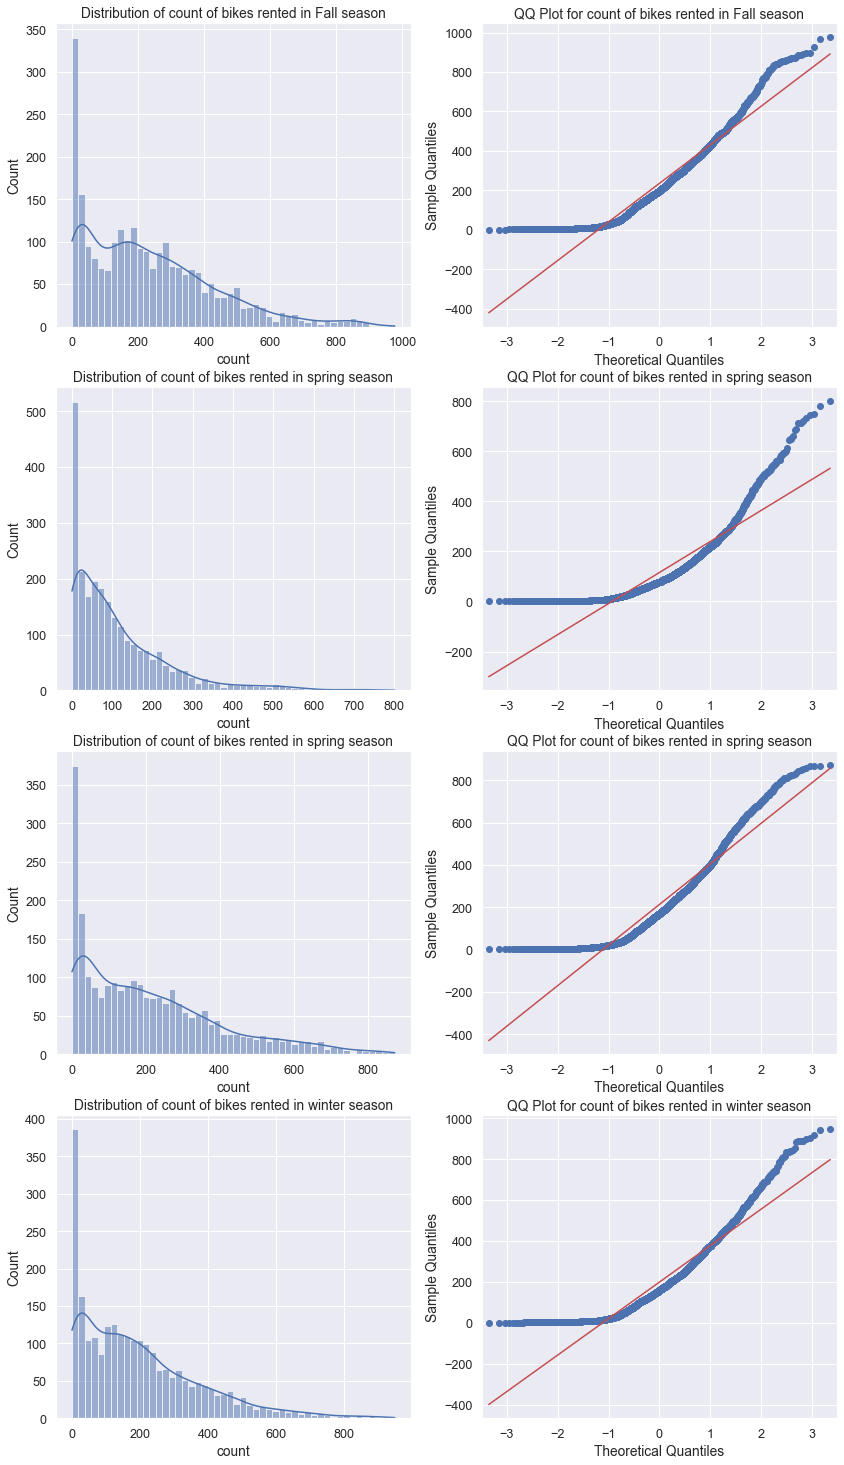

In [175]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# fall_season
sns.histplot(data=fall_season,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of count of bikes rented in Fall season')
sm.qqplot(fall_season, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for count of bikes rented in Fall season')

# spring_season
sns.histplot(data=spring_season,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of count of bikes rented in spring season')
sm.qqplot(spring_season, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for count of bikes rented in spring season')

# summer_season
sns.histplot(data=summer_season,bins=50,kde=True,
             ax=axis[2,0]).set_title('Distribution of count of bikes rented in spring season')
sm.qqplot(summer_season, line = 's',ax=axis[2,1])
axis[2,1].set_title('QQ Plot for count of bikes rented in spring season')

# winter_season
sns.histplot(data=winter_season,bins=50,kde=True,
             ax=axis[3,0]).set_title('Distribution of count of bikes rented in winter season')
sm.qqplot(winter_season, line = 's',ax=axis[3,1])
axis[3,1].set_title('QQ Plot for count of bikes rented in winter season')


plt.show()


# Levene test and Shapiro wilk test

In [144]:
stats.levene(fall_season, spring_season,summer_season,winter_season)

LeveneResult(statistic=175.4499158319903, pvalue=7.318707493311967e-111)

In [139]:
stats.shapiro(fall_season)

ShapiroResult(statistic=0.918503999710083, pvalue=9.363667722357491e-35)

In [140]:
stats.shapiro(spring_season)

ShapiroResult(statistic=0.8119370341300964, pvalue=0.0)

In [141]:
stats.shapiro(summer_season)

ShapiroResult(statistic=0.8977507948875427, pvalue=6.10155058894469e-38)

In [142]:
stats.shapiro(winter_season)

ShapiroResult(statistic=0.8945555090904236, pvalue=2.1980306684204318e-38)

# Observations

1. according to Shapiro wilk test all season data does not come from normal distributions of data.
2. variance is not same in all above season datas.
3. According to QQ plot we can tell they are not normal distributions.
4.  although our assumptions are wrong lets perform one way Anova Test on data.


# Testing

In [162]:
anova_test, p_value=stats.f_oneway(fall_season, spring_season,summer_season,winter_season)
anova_test, p_value

(223.34941658406007, 2.9611177995397116e-140)

In [163]:
HTResult(p_value)

Reject NULL HYPOTHESIS


# Conclusion : 

1. As the p value < alpha(0.05) , 
2. we reject H0 and thus we can conclude that count of bikes differs with a change in season.

  # 3.No. of cycles rented similar or different in different weather



# ANNOVA to check if no. of cycles rented is similar or different in different Weather


# Step 1: Define Null & Alternate Hypothesis


*  H0 (Null Hupothesis) : count of bikes rented is same in diffrent types of weather.
*  Ha (Alternate Hupothesis) : count of bikes rented is different in diffrent types of weather.
*  alpha: 0.05



# Step 2: Validate the assumptions


*  Normality – that each sample is taken from a normally distributed population
*  Sample independence – that each sample has been drawn independently of the other samples
*  Variance equality – that the variance of data in the different groups should be the same
*  Your dependent variable – here, “count”, should be continuous – that is, measured on a scale which can be subdivided        using increments



# Checking assumptions of the test (Normality, Equal Variance)

In [4]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [7]:
clear_weather=df[df['weather']=='Clear']['count'].sample(5000)
mist_weather=df[df['weather']=='Mist, Few clouds']['count'].sample(2500)
rain_weather=df[df['weather']=='Light Snow, Rain, Thunder']['count'].sample(800)
thunder_weather=df[df['weather']=='Heavy Snow, Rain, Thunder,Fog']['count']

Series([], Name: count, dtype: int64)

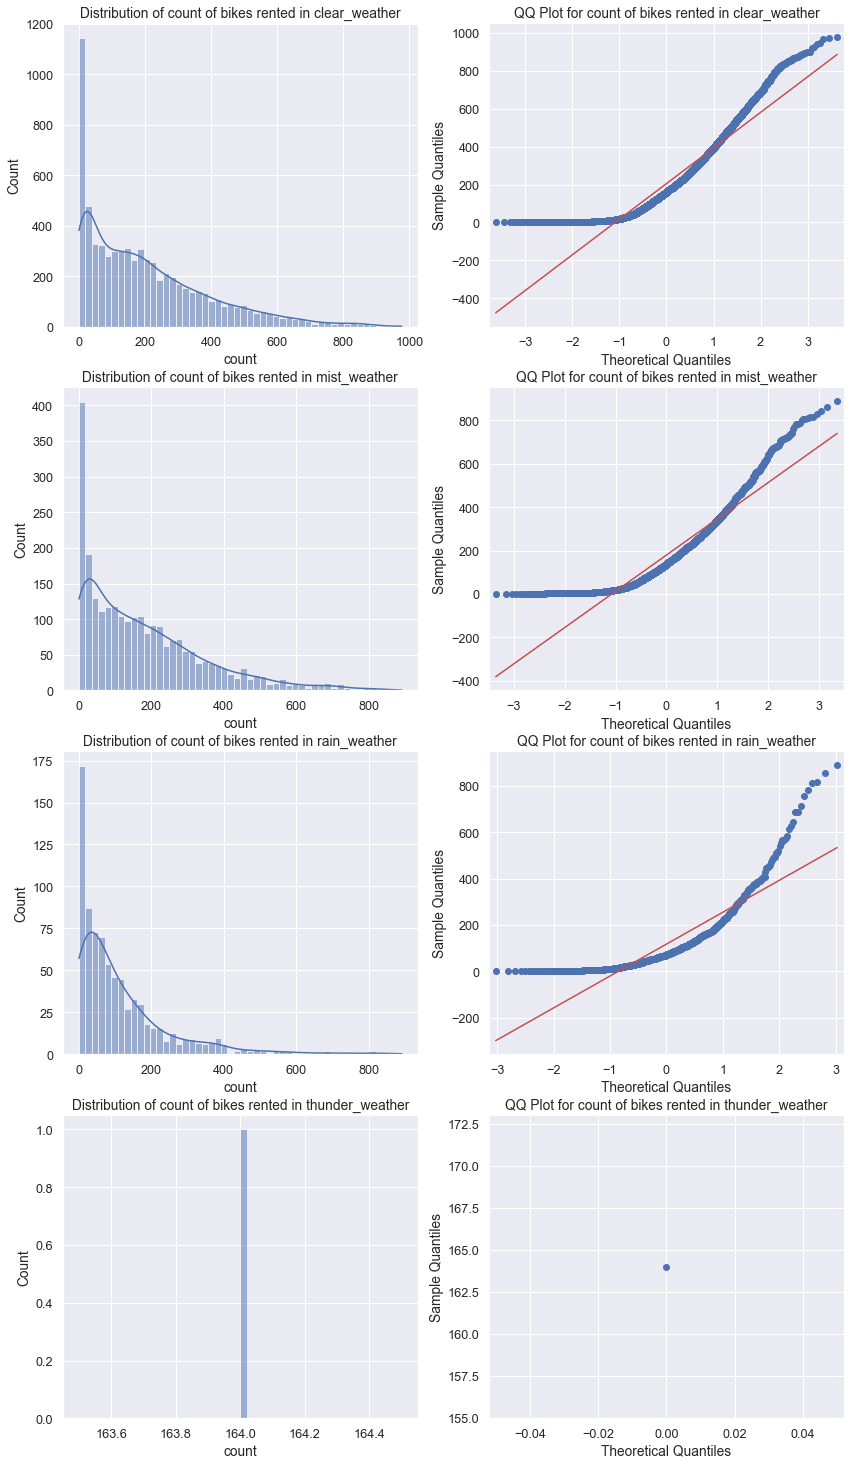

In [176]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14,5))
fig.subplots_adjust(top=4)

# clear_weather
sns.histplot(data=clear_weather,bins=50,kde=True,
             ax=axis[0,0]).set_title('Distribution of count of bikes rented in clear_weather')
sm.qqplot(clear_weather, line = 's',ax=axis[0,1])
axis[0,1].set_title('QQ Plot for count of bikes rented in clear_weather')

# mist_weather
sns.histplot(data=mist_weather,bins=50,kde=True,
             ax=axis[1,0]).set_title('Distribution of count of bikes rented in mist_weather')
sm.qqplot(mist_weather, line = 's',ax=axis[1,1])
axis[1,1].set_title('QQ Plot for count of bikes rented in mist_weather')

# rain_weather
sns.histplot(data=rain_weather,bins=50,kde=True,
             ax=axis[2,0]).set_title('Distribution of count of bikes rented in rain_weather')
sm.qqplot(rain_weather, line = 's',ax=axis[2,1])
axis[2,1].set_title('QQ Plot for count of bikes rented in rain_weather')

# thunder_weather
sns.histplot(data=thunder_weather,bins=50,kde=True,
             ax=axis[3,0]).set_title('Distribution of count of bikes rented in thunder_weather')
sm.qqplot(thunder_weather, line = 's',ax=axis[3,1])
axis[3,1].set_title('QQ Plot for count of bikes rented in thunder_weather')


plt.show()


# Levene test and Shapiro wilk test

In [181]:
stats.levene(clear_weather,mist_weather,rain_weather)

LeveneResult(statistic=79.93512036275075, pvalue=3.559219966802828e-35)

In [183]:
stats.shapiro(clear_weather)

ShapiroResult(statistic=0.8890265226364136, pvalue=0.0)

In [184]:
stats.shapiro(mist_weather)

ShapiroResult(statistic=0.8736147880554199, pvalue=4.756006987918429e-41)

In [185]:
stats.shapiro(rain_weather)

ShapiroResult(statistic=0.7667048573493958, pvalue=3.5894792640953674e-32)

# Observations

1. according to Shapiro wilk test all season data does not come from normal distributions of data.
2. variance is not same in all above season datas.
3. According to QQ plot we can tell they are not normal distributions.
4. Thunder_weather count is very small so not including in test it may impact the tests.
4. although our assumptions are wrong lets perform one way Anova Test on data.


# Testing

In [186]:
anova_test, p_value=stats.f_oneway(clear_weather,mist_weather,rain_weather)
anova_test, p_value

(86.21975038179764, 8.69047164192814e-38)

In [187]:
HTResult(p_value)

Reject NULL HYPOTHESIS


#  Conclusion :

1. As the p value < alpha(0.05).
2. we reject H0 and thus we can conclude that count of bikes differs with a change in weather.

# 4.Weather is dependent on season (check between 2 predictor variable)


# Chi-square test to check if weather is dependent on the season


# Step 1: Define Null & Alternate Hypothesis


* H0 : Both weather and seasons are independent of each other
* Ha : There is dependency of weather on Seasons
* aplha = 0.05


# Step 2: Validate the assumptions


* Both variables are categorical.
* All observations are independent.
* Cells in the contingency table are mutually exclusive.



# Checking assumptions of the test (Normality, Equal Variance)

In [190]:
df1=pd.crosstab(df['weather'],df['season'],margins=True,margins_name='Total')
df1

season,Fall,Spring,Summer,Winter,Total
weather,,,,,
Clear,1930,1759,1801,1702,7192
"Heavy Snow, Rain, Thunder,Fog",0,1,0,0,1
"Light Snow, Rain, Thunder",199,211,224,225,859
"Mist, Few clouds",604,715,708,807,2834
Total,2733,2686,2733,2734,10886


In [ ]:
df1=df1[~(df1['weather']=='Heavy Snow, Rain, Thunder,Fog')]

In [ ]:
# Removed heavy thunder so that it won't affect the chi squared test.

In [201]:
df.groupby('weather')['season'].describe()

,count,unique,top,freq
weather,,,,
Clear,7192,4,Fall,1930
"Light Snow, Rain, Thunder",859,4,Winter,225
"Mist, Few clouds",2834,4,Winter,807


In [199]:
stat, p_value, dof, expected = stats.chi2_contingency(df1)
stat, p_value, dof, expected

(49.158655596893624,
 3.118527332512692e-05,
 16,
 array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03,
         7.19200000e+03],
        [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01,
         1.00000000e+00],
        [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02,
         8.59000000e+02],
        [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02,
         2.83400000e+03],
        [2.73300000e+03, 2.68600000e+03, 2.73300000e+03, 2.73400000e+03,
         1.08860000e+04]]))

In [202]:
HTResult(p_value)

Reject NULL HYPOTHESIS


#  Conclusion :

1. As the p value < alpha(0.05).
2. we reject H0 and thus we can conclude that weather and season are not independent to each other.
3. therefore there is dependency between weather and season.


# Conclusion(Important Observations)

* There are total 4 categorical features namely Season, holiday, weekend, weather
* No Missing values are present , neither any duplicated row is there.
* Data consists of renting bikes over two years i.e 2011 and 2012.
* Temp,atemp and humidity are not having much outliers.
* More bikes are rented during clear weather.
* data contains only 19 days of a month.
* For weather Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog no. of users renting bikes is much low.
* count for bikes rented in working day is much higher than non working day.
* Irrespective of season bikes are rented equally.
* The registered user count has higher co-relation with the count as compared to the casual user count.
* From Testing
    * The count of renting of bikes in both working and non-working days is equal.(T Test Independent).
    * The count of bikes differs with a change in season(one way Anova).
    * The count of bikes differs with a change in weather(one way Anova).
    * There is dependency between weather and season(chi square).


# Recommendations


*  we can say that the major factors affecting the count of bikes rented are season and weather.
*  The working and non working days can't be considered here because it will not impact the Renting the bikes.
*  we can dip in renting bikes in months of NOV,DEC,JAN and FEB so try to lent Car instead of bikes during these months.
*  During thunder or heavy snow and ice pallets weather try to rent Cars instead of bikes for safety purposes.
*  To convert casual user to permanent user(registered users), company must keep some offers in monthly or yearly              membership instead of one time payment. 